## Building an Image Classifier Using the sequential api
### step1: data preparation 

In [1]:
import tensorflow as tf
from tensorflow import keras

# load the dataset
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 47s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
(60000, 28, 28)


In [3]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):


In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0


In [5]:
# LIST CLASS NAMES TO KNOW FEATURES
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# test it out

class_names[y_train[0]]

'Coat'

In [7]:
## build the model using the sequential api
tf.random_set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

What is happening in the above code?

* `tf.random_set_seed(42)` :- sets tensorflows random seed to make the reults reproducible. the random weights og the hidden layers and the output layers will be the same every time one run's the notebook
* `model = keras.models.Sequential()`:- creates a sequential model.  this is the simplest kind of keras model for neural networks that are just composed of a single stack of layers connected sequentially. this is called the sequential API
* `model.add(keras.layers.Input(shape=[28,28]))`:- builds the first input layer. the specified shape does not include  the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer
* `model.add(keras.layers.Flatten())`:- the fallen's layer role is to convert each input image into a ID array, for example if it recieves a batch of shape [32,28,28]. it will reshape it to [32, 784]. i.e if it recieves an input data `x`, it computes `X.reshape(-1, 784)`. basically it does simple preprocessing.
  
* `model.add(keras.layers.Dense(300, activation="relu"))`:- t will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

- instead of adding layer one by one as the prevous code, it is often convinient to pass a list of layers when creating the `sequential` model.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

In [10]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

iven the many parameters of the dense layer, the model runs a risk of **overfitting**
to get a model's list of layers, you can use the `layers` attribute.  you can use the `get_layer()` method to access a layer by name.

In [11]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

all the parameters of a layer can be accessed using the `get_weights()` method and the `set_weights()` method. For a `dense` layer, this includes both the connection weights and bias terms:

In [13]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.00884887,  0.04434751, -0.06659988, ..., -0.04998966,
         0.06128688, -0.00546299],
       [-0.0723554 ,  0.07424681,  0.05199935, ...,  0.01102624,
        -0.02522554,  0.01505442],
       [-0.07184575, -0.02137248,  0.04382408, ..., -0.06817339,
         0.0727504 , -0.02009106],
       ...,
       [ 0.01461565,  0.06372903,  0.04298247, ..., -0.03597487,
         0.00032882, -0.0434563 ],
       [ 0.05332404, -0.0297682 , -0.05012984, ..., -0.06574687,
         0.00656275,  0.02636789],
       [ 0.03228738, -0.01209182,  0.03055248, ..., -0.04513168,
         0.01264814,  0.01146452]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

from the above we can notice that  the `dense` layer initialized the connection weights randomly and the biases were initialized to zeros. 

### Compiling the model
after a model has been created, one must call the `compile()` method to specify the loss function and the optimizer to use.  Optionally you can specify a list of extra metrics to compute during training and evaluation.

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


## training and evaluating the model
to train the model, we simply call the `fit` method:

In [22]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.6849 - loss: 0.9979 - val_accuracy: 0.8242 - val_loss: 0.5181
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8252 - loss: 0.5060 - val_accuracy: 0.8452 - val_loss: 0.4437
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.8404 - loss: 0.4541 - val_accuracy: 0.8600 - val_loss: 0.4184
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.8565 - loss: 0.4135 - val_accuracy: 0.8568 - val_loss: 0.4044
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8603 - loss: 0.4030 - val_accuracy: 0.8666 - val_loss: 0.3880
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8655 - loss: 0.3824 - val_accuracy: 0.8742 - val_loss: 0.3692
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8702 - loss: 0.3649 - val_accuracy: 0.8638 - val_loss: 0.3763
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.8761 -

Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. ***If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.***

 Notice that the training loss went down, which is a good sign, ***and the validation accuracy reached 88.94% after 30 epochs. That’s slightly below the training accuracy, so there is a little bit of overfitting going on, but not a huge amount.***


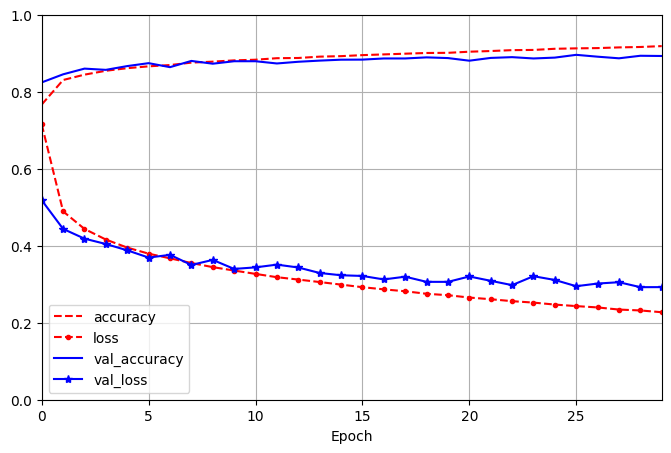

In [27]:
# visualize the odel and the metrics

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

insights rom above:

- both the training accuracy and the validation accuracy steadily increases during training while the training loss and the validation loss decreases. this is good
- the validation curves are rather close to each other at first, but they et further apart over time, which shows there is a little bit of overfitting.
- in this particulat case, the model looks like it performed better on the validation set than on the training set at the beginning of training but that's not actually the case.
- given the curvee has not merged, you should continue training, this is as simple as calling the `fit` method again. since keras just continues training where it left off, one should be able to reach about 89.8% validation accuracy, while training accuracy will continue to rise up to 100%


*if still unsatisfied with the performance of the model, one should go back and tune the hyperparameters.*
 first check is the **learning rate** 

Once satisfied with the **model's validation accuracy** you should evaluate it on the test set to estimate the generalization error before deploying the model to production.
To do so, we use the `evaluate()` method 

In [28]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8807 - loss: 0.3320


[0.3306650221347809, 0.8834999799728394]